<a href="https://colab.research.google.com/github/NoelleI/AI-Experiments-Pigmentation/blob/master/redness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!git clone https://github.com/NoelleI/Pigmentation.git

Cloning into 'Pigmentation'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 725 (delta 44), reused 71 (delta 5), pack-reused 580
Receiving objects: 100% (725/725), 91.22 MiB | 28.06 MiB/s, done.
Resolving deltas: 100% (249/249), done.


In [0]:
import numpy as np
from scipy import ndimage, misc
import re
import os
from datetime import datetime
import matplotlib.pyplot as plt
import skimage


pigs = []
filenames_dict = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 2/Spot 1"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:
           # print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            n =  re.match("(.*)(2019)(\d*_\d*)_(.*)", filename)
            if n:
              key = n.group(3)

              key = datetime.strptime(key, '%m%d_%H%M%S')
           # print(key, " ")
           # print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
              filenames_dict.update({key: os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict.keys()):
  #print(key,filenames_dict[key], "\n")
  image = plt.imread(filenames_dict[key])
  #image = skimage.transform.resize(image, (192,256,3))  
  
  pigs+= [image]
  
  
pigs = np.asarray(pigs)

In [4]:
filenames

['1_F_43_XX_25_20190228_214705_FA101129_0100_SPOTS_57_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR57.jpg',
 '1_F_43_XX_25_20190226_224523_FA101129_0100_SPOTS_24_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR24.jpg',
 '1_F_43_XX_25_20190223_170715_FA101129_0100_SPOTS_XX_SPOTS#01_S_UnitedStates_CND_XX.jpg',
 '1_F_43_XX_25_20190225_100933_FA101129_0100_SPOTS_71_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR71.jpg',
 '1_F_43_XX_25_20190306_230513_FA101129_0100_SPOTS_64_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR64.jpg',
 '1_F_43_XX_25_20190310_203414_FA101129_0100_SPOTS_60_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR60.jpg',
 '1_F_43_XX_25_20190227_212058_FA101129_0100_SPOTS_51_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR51.jpg',
 '1_F_43_XX_25_20190301_083613_FA101129_0100_SPOTS_81_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR81.jpg',
 '1_F_43_XX_25_20190228_083804_FA101129_0100_SPOTS_74_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR74.jpg',
 '1_F_43_XX_25_20190310_104002_FA101129_0100_SPOTS_86_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR

In [5]:
len(pigs)

18

In [6]:
pigs.shape

(18, 480, 640, 3)

In [0]:
##Note that this has been adapted in an ad-hoc way for comparison of Exp 2 to Exp 1 spot 4


import pandas as pd
from scipy import stats
#del str
def measure_score(pigs): 
  
    score = []

    i = 0
    

    for pig in pigs:
        print(i, "\n")
        g = pig[:,:,1].reshape(-1)  #- 3*imagen[:,:,1].reshape(-1)/8
        b = pig[:,:,2].reshape(-1)
            

        if i > 0:

          mg = np.min(g)               ###may need to scroll over earlier days ###
          ag = np.mean(g)
          sg = stats.skew(g)

          mg_last = np.min(g_last)
          ag_last = np.mean(g_last)
          sgl = stats.skew(g_last)
 
          mb = np.min(b)
          ab = np.mean(b)
          
          mb_last = np.min(b_last)
          ab_last = np.mean(b_last)

          delbaa = np.abs(ab-ab_last)
          delbma = np.abs(sg*mb - sgl*mb_last)

          delgaa = np.abs(ag -ag_last)
          delgma = np.abs(sg*mg - sgl*mg_last)

          delba = ab-ab_last
          delbm = sg*mb - sgl*mb_last

          delga = ag -ag_last
          delgm = sg*mg - sgl*mg_last
          
          print("i =", i, "delavg", delbaa/delgaa)
          print("i = ", i, "delavm", delbma/delgma)

          if delbaa/delgaa >= (1*10**3.25)/(1*10**3.1):
            
            sca = 0
          else:
            sca = delga

          if delbma/delgma >= (1*10**3.25)/(1*10**3.1):
           
            scm = 0
          else:
            scm = delgm

          sc = (sca + scm)/2
          print(sca, scm, sc, "\n")

          




            
          

        else:
          #sc = 0  ###change this
          
          g_last = g_rlast
          b_last = br_last
          
          mg = np.min(g)               ###may need to scroll over earlier days ###
          ag = np.mean(g)
          sg = stats.skew(g)

          mg_last = np.min(g_last)
          ag_last = np.mean(g_last)
          sgl = stats.skew(g_last)
 
          mb = np.min(b)
          ab = np.mean(b)
          
          mb_last = np.min(b_last)
          ab_last = np.mean(b_last)

          delbaa = np.abs(ab-ab_last)
          delbma = np.abs(sg*mb - sgl*mb_last)

          delgaa = np.abs(ag -ag_last)
          delgma = np.abs(sg*mg - sgl*mg_last)

          delba = ab-ab_last
          delbm = sg*mb - sgl*mb_last

          delga = ag -ag_last
          delgm = sg*mg - sgl*mg_last
          
          print("i = 0 delavg", delbaa/delgaa)
          print("i = 0 delavm", delbma/delgma)

          if delbaa/delgaa >= (1*10**3.25)/(1*10**3.1):
            
            sca = 0
          else:
            sca = delga

          if delbma/delgma >= (1*10**3.25)/(1*10**3.1):
           
            scm = 0
          else:
            scm = delgm

          sc = (sca + scm)/2
          print(sca, scm, sc, "\n")

          


          #print("here min g_last = ", np.min(g_last, "b_last = ", b_last)

        
       
        score += [sc]
        
        i += 1
       
      
        
    
    green_score = np.array(score)
    
    return(green_score)
        

In [66]:

green_score =  measure_score(pigs)

0 

i = 0 delavg nan
i = 0 delavm nan
0.0 0.0 0.0 

1 

i = 1 delavg 0.4052356453341036
i =  1 delavm 0.3382094208548524
-8.82895182291665 248 119.58552408854167 

2 

i = 2 delavg 1.412609260364378
i =  2 delavm 1.7905614315051086
0 0 0.0 

3 

i = 3 delavg 0.8853763434055365
i =  3 delavm 0.7793083766164464
11.316188151041672 30 20.658094075520836 

4 

i = 4 delavg 1.1786708857432728
i =  4 delavm 0.5207531282271135
-9.289404296874977 246 118.35529785156251 

5 

i = 5 delavg 0.5017552661232947
i =  5 delavm 0.24486069001266436
5.009108072916689 7 6.0045540364583445 

6 

i = 6 delavg 1.3262806791754382
i =  6 delavm 0.3357137837562838
-17.548277994791647 242 112.22586100260418 

7 

i = 7 delavg 0.14066063958481587
i =  7 delavm 0.28637937689704224
-7.050065104166663 254 123.47496744791667 

8 

i = 8 delavg 0.6987012588790424
i =  8 delavm 0.4026001105981879
-24.841513671874992 235 105.0792431640625 

9 



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:106: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:114: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in ubyte_scalars


i = 9 delavg 1.7860621104434968
i =  9 delavm 0.7217892298986892
0 255 127.5 

10 

i = 10 delavg 1.9440778978947393
i =  10 delavm 1.2210859691649745
0 10 5.0 

11 

i = 11 delavg 0.5305185031484712
i =  11 delavm 0.07262856814116171
-10.071748046875001 4 -3.0358740234375006 

12 

i = 12 delavg 0.765031407465826
i =  12 delavm 0.7024905346528583
-8.40400716145831 253 122.29799641927085 

13 

i = 13 delavg 1.1384800143984044
i =  13 delavm 0.4735779242021972
-16.241673177083328 247 115.37916341145834 

14 

i = 14 delavg 0.7187045789095198
i =  14 delavm 0.4608436334148894
-17.554016927083325 245 113.72299153645834 

15 

i = 15 delavg 0.8610307772376182
i =  15 delavm 0.5656155105616583
-6.604921875000002 2 -2.302460937500001 

16 

i = 16 delavg 1.3431912163504698
i =  16 delavm 0.0390218695220819
-4.8987207031249795 254 124.55063964843751 

17 

i = 17 delavg 0.9866127022441705
i =  17 delavm 0.3607580183327276
-8.309873046874998 3 -2.654936523437499 



In [13]:
(1*10**3.25)/(1*10**3.1)

1.412537544622754

Text(0.5, 1.0, 'Experiment 2, Spot 1')

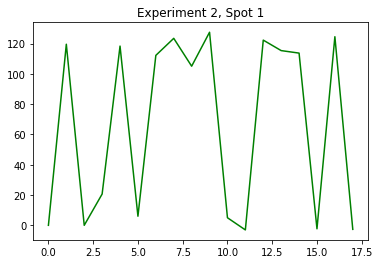

In [69]:

plt.plot(green_score, 'g-')


plt.title('Experiment 2, Spot 1')



In [0]:
#del str
pigs = []
filenames_dict_pigs = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 1/Spot 4"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:   ####remember to update in order to avoid masks###
           # print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            #n =  re.match("(.*)(2019)(\d*_\d*)_(.*)", filename)
            #key = n.group(3)

            #key = datetime.strptime(key, '%m%d_%H%M%S')
           # print(key, " ")
           # print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
            #filenames_dict.update({key: os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
            n = re.match("(\d*)", filename)
            #print(n.group(), " ")
            #print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
            filenames_dict_pigs.update({int(n.group()): [os.path.join(root, filename), filename]})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict_pigs.keys()):
  #print(key,filenames_dict[key], "\n")
  image = plt.imread(filenames_dict_pigs[key][0])
  
  pigs+= [image]
  
  
pigs = np.asarray(pigs)

In [0]:
g_rlast = pigs[0][:,:,1].reshape(-1)
g_rlast.shape
br_last = pigs[0][:,:,2].reshape(-1)

In [57]:
#del str
green_score = measure_score(pigs)


0 

i = 0 delavg nan
i = 0 delavm nan
0.0 0.0 0.0 

1 

i = 1 delavg 2.444737
i =  1 delavm 1.0518796384488918
0 -0.007843137 -0.003921568393707275 

2 

i = 2 delavg 1.4812952
i =  2 delavm 1.7552968867740235
0 0 0.0 

3 

i = 3 delavg 1.6442915
i =  3 delavm 7.417702141914257
0 0 0.0 

4 

i = 4 delavg 0.88656896
i =  4 delavm 0.7058202561648493
0.009486318 0.0 0.00474315881729126 

5 

i = 5 delavg 0.9738218
i =  5 delavm 0.6942252465710993
-0.06380963 -0.04705882 -0.055434226989746094 

6 

i = 6 delavg 0.83435714
i =  6 delavm 0.6596158902577837
0.009664178 -0.015686274 -0.003011047840118408 

7 



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in float_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:106: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in float_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:114: RuntimeWarning: invalid value encountered in double_scalars


i = 7 delavg 0.6375181
i =  7 delavm 3.9020794938448224
0.035803378 0 0.017901688814163208 

8 

i = 8 delavg 0.46304846
i =  8 delavm 0.7150583036667418
-0.019302547 0.019607842 0.0001526474952697754 

9 

i = 9 delavg 0.52370507
i =  9 delavm 0.8865323563968793
0.027959168 0.0 0.013979583978652954 

10 

i = 10 delavg 53.117065
i =  10 delavm 0.8104692544479852
0 0.0039215684 0.0019607841968536377 

11 

i = 11 delavg 1.2187477
i =  11 delavm 0.6026962236982846
0.011287808 0.007843137 0.009565472602844238 

12 

i = 12 delavg 0.9368215
i =  12 delavm 0.6711695444812432
0.03494662 0.043137252 0.03904193639755249 

13 

i = 13 delavg 0.3382216
i =  13 delavm 0.8221280682642725
0.025984168 0.039215684 0.03259992599487305 

14 

i = 14 delavg 4.2636037
i =  14 delavm 1.1430391278372
0 0.043137252 0.021568626165390015 

15 

i = 15 delavg 3.6720648
i =  15 delavm 4.107196700468229
0 0 0.0 

16 

i = 16 delavg 1.1086414
i =  16 delavm 1.3184156748091345
0.03564 0.054901958 0.04527097940444

Text(0.5, 1.0, 'Experiment 1, Spot 4')

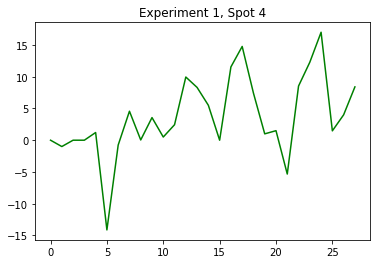

In [58]:

green_score = 255*green_score

plt.plot(green_score, 'g-')

plt.title('Experiment 1, Spot 4')

In [43]:
green_score

array([165., 165., 166., ..., 159., 160., 161.], dtype=float32)

In [0]:
import numpy as np
from scipy import ndimage, misc
import re
import os
from datetime import datetime
import matplotlib.pyplot as plt
import skimage


pigs = []
filenames_dict = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 2/Spot 4"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:
           # print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            n =  re.match("(.*)(2019)(\d*_\d*)_(.*)", filename)
            if n:
              key = n.group(3)

              key = datetime.strptime(key, '%m%d_%H%M%S')
           # print(key, " ")
           # print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
              filenames_dict.update({key: os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict.keys()):
  #print(key,filenames_dict[key], "\n")
  image = plt.imread(filenames_dict[key])
  #image = skimage.transform.resize(image, (192,256,3))  
  
  pigs+= [image]
  
  
pigs = np.asarray(pigs)

In [61]:
#del str
green_score = measure_score(pigs)

0 

i = 0 delavg 0.8719090268072689
i = 0 delavm 0.26307666337951413
-25.569520874023425 -7.840218050013746 -16.704869462018586 

1 

i = 1 delavg 2.1282907898144767
i =  1 delavm 0.0642135781542345
0 -26.0 -13.0 

2 

i = 2 delavg 8.27893374889159
i =  2 delavm 0.5114245560819873
0 -34.0 -17.0 

3 

i = 3 delavg 0.7817647525702236
i =  3 delavm 0.9912299640229002
-21.375673217773425 -44.0 -32.68783660888671 

4 

i = 4 delavg 2.648494864080347
i =  4 delavm 0.4327986264351121
0 -22.0 -11.0 

5 

i = 5 delavg 5.085666101885376
i =  5 delavm 0.7526145396612143
0 -12.0 -6.0 

6 

i = 6 delavg 4.276152435000569
i =  6 delavm 0.8917173349421021
0 -24.0 -12.0 

7 

i = 7 delavg 0.46074015128493245
i =  7 delavm 0.941365634647563
2.090840454101567 -15.0 -6.4545797729492165 

8 

i = 8 delavg 0.33901845304799205
i =  8 delavm 0.5647505296204994
7.221917928059895 8.0 7.6109589640299475 

9 

i = 9 delavg 0.08800356779895356
i =  9 delavm 0.8177160317681922
4.1837440999348985 -15.0 -5.408127950

Text(0.5, 1.0, 'Experiment 2, Spot 4')

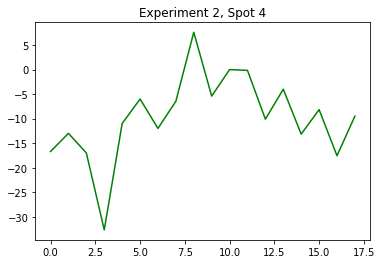

In [62]:


plt.plot(green_score, 'g-')

plt.title('Experiment 2, Spot 4')

In [6]:
green_score

array([], dtype=float64)

In [0]:
pigs = []
filenames_dict = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 2/Spot 2"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:
           # print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            n =  re.match("(.*)(2019)(\d*_\d*)_(.*)", filename)
            if n:
              key = n.group(3)

              key = datetime.strptime(key, '%m%d_%H%M%S')
           # print(key, " ")
           # print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
              filenames_dict.update({key: os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict.keys()):
  #print(key,filenames_dict[key], "\n")
  image = plt.imread(filenames_dict[key])
  #image = skimage.transform.resize(image, (192,256,3))  
  
  pigs+= [image]
  
  
pigs = np.asarray(pigs)

In [22]:
green_score = measure_score(pigs)

here
here 4
here 5
here 6
here 9
here 10
here 16
here 17


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in ubyte_scalars


Text(0.5, 1.0, 'Experiment 2, Spot 2')

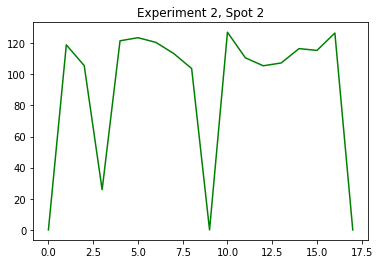

In [23]:

plt.plot(green_score, 'g-')
#plt.plot(blue, 'b-')
plt.title('Experiment 2, Spot 2')

In [0]:
red

array([ 92,  88,  88, 104,  81,  71,  79,  82,  84,  86,  86,  93,  97,
        82,  97,  70,  93,  84], dtype=uint8)